<a href="https://colab.research.google.com/github/LuisSeabra/Trabalho-Puc-Rio-Luis-Seabra/blob/main/Trabalho_de_ML_Puc_Rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este trabalho se propõe a analisar um conjunto de dados médicos, chamado "Heart Disease Dataset" o qual é um conjunto de dados disponível no Kaggle que contendo informações relacionadas a fatores de risco e diagnóstico de doenças cardíacas. Esse conjunto de dados é amplamente utilizado em estudos e análises na área de saúde e ciência de dados. Abaixo estão algumas das variáveis comuns analisadas nesses conjuntos de dados:

Idade: A idade do paciente em anos. A idade é um fator importante na avaliação do risco de doença cardíaca, pois o risco aumenta com a idade.

Sexo: O sexo do paciente, geralmente codificado como masculino (1) ou feminino (0). O sexo pode ser um fator de risco para doenças cardíacas, com os homens tendo um risco geralmente mais elevado do que as mulheres.

Pressão arterial: A pressão arterial do paciente, muitas vezes dividida em duas medidas: pressão arterial sistólica (pressão máxima durante uma batida cardíaca) e pressão arterial diastólica (pressão mínima entre as batidas cardíacas). A pressão arterial elevada é um fator de risco para doenças cardíacas.

Colesterol: Os níveis de colesterol no sangue do paciente, geralmente divididos em colesterol total, colesterol HDL (lipoproteína de alta densidade, conhecida como "colesterol bom") e colesterol LDL (lipoproteína de baixa densidade, conhecida como "colesterol ruim"). Níveis elevados de colesterol LDL e baixos níveis de colesterol HDL estão associados a um maior risco de doença cardíaca.

Açúcar no sangue em jejum (Fasting Blood Sugar - FBS): O nível de glicose no sangue do paciente após um período de jejum. Níveis elevados de açúcar no sangue estão associados a um maior risco de diabetes, que por sua vez é um fator de risco para doenças cardíacas.

Eletrocardiograma (ECG): Resultados de testes de ECG, que podem indicar anormalidades na atividade elétrica do coração. Anormalidades no ECG podem ser indicativas de problemas cardíacos.

Angina induzida por exercício: Um tipo específico de dor no peito que ocorre durante atividade física ou estresse. A angina é um sintoma comum de doença cardíaca.

Capacidade de exercício: A capacidade do paciente para realizar atividade física, muitas vezes
Para a execução do trabalho, iremos importar as "ferramentas" necessárias para trabalhar os dados e fazer análises gráficas e por meio de algorítmos, utilizando-se de validação cruzada para obatrobter as métricas necessárias para comparação dos mesmos.



In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

In [ ]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame do Pandas
heart_data = pd.read_csv("heart.csv")

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(heart_data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


# Nova seção

Verificar se há células nulas

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


verificar se há linhas nulas

In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Verificou-se que não há linhas nulas e, agora verificaremos se há linhas repetitas.

In [ ]:
heart_data.duplicated().sum()

723

Como hás 723 linhas repetidas, será necessário removê-las a fim de evitar overfitting.

In [ ]:
heart_data = heart_data.drop_duplicates()

Ficamos com 302 linhas, depois de termos eliminado as 723

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Podemos analisar graficamente as variáveis que têm maior correlação com a variável "target"  (ter a doença ou não).

<Axes: >

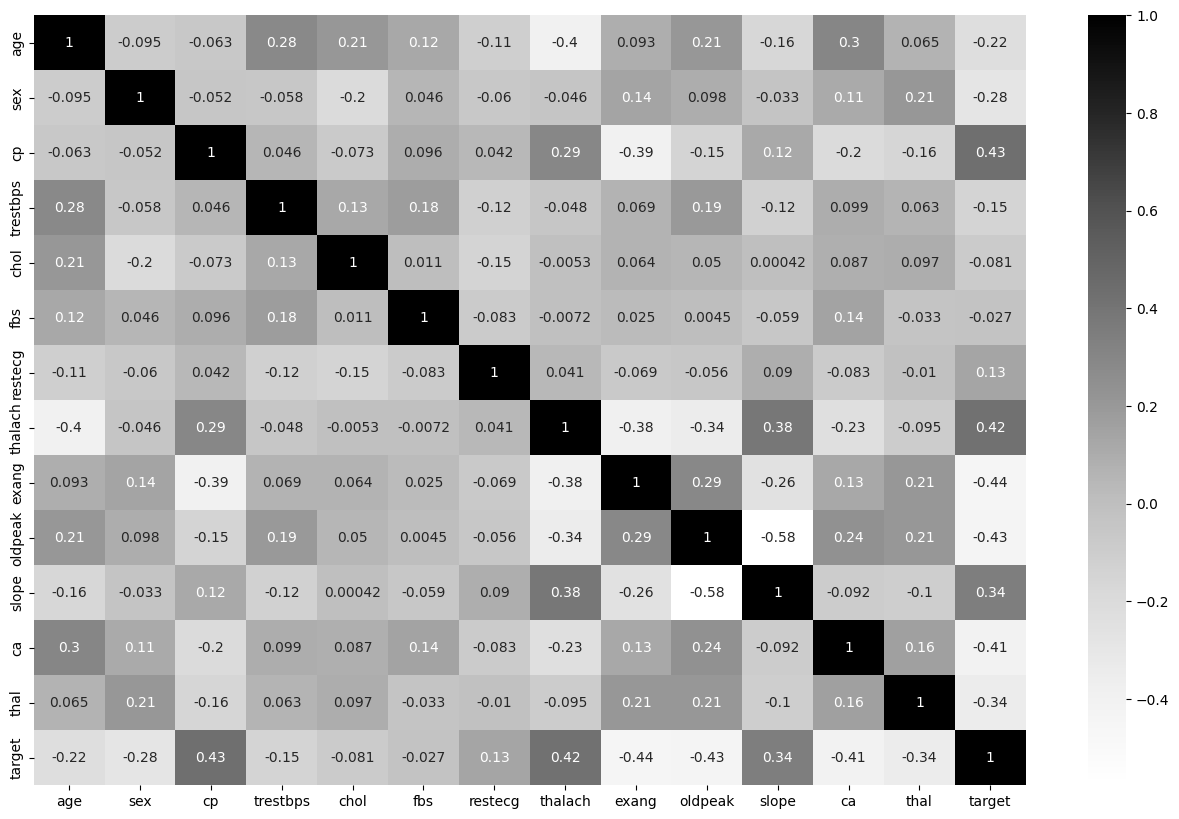

In [ ]:
plt.figure (figsize=(16, 10))
sns.heatmap(heart_data.corr(), annot=True, cmap='Greys')

In [ ]:
heart_data.head (2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
for c in heart_data. columns:
  print (f" {c}:{heart_data [c].nunique ()}")

 age:41
 sex:2
 cp:4
 trestbps:49
 chol:152
 fbs:2
 restecg:3
 thalach:91
 exang:2
 oldpeak:40
 slope:3
 ca:5
 thal:4
 target:2


In [ ]:
categoricas = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

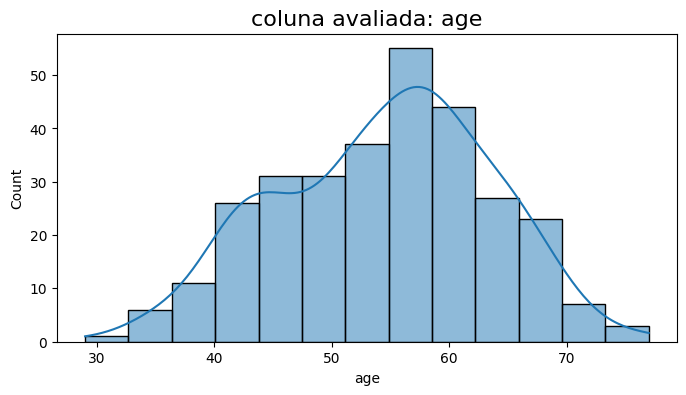

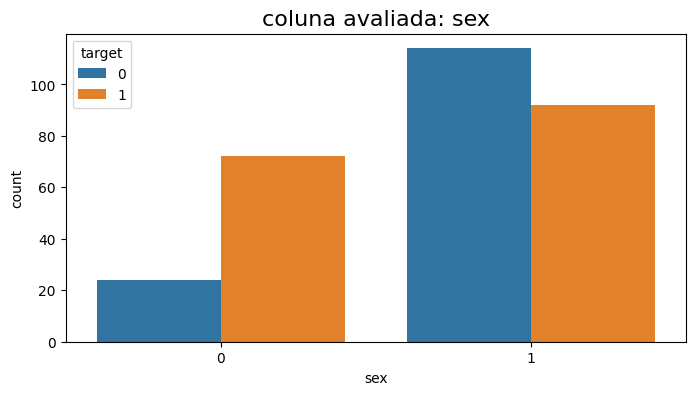

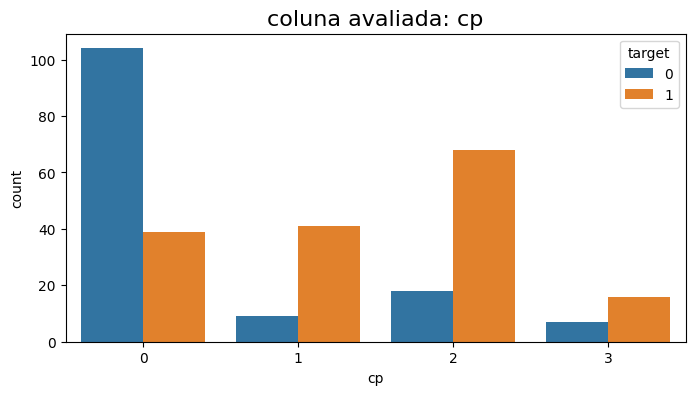

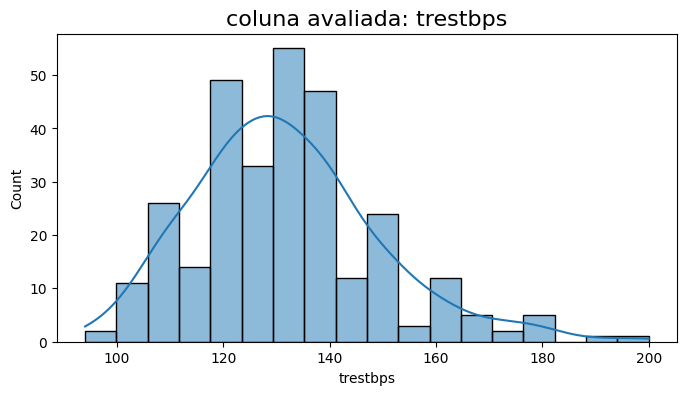

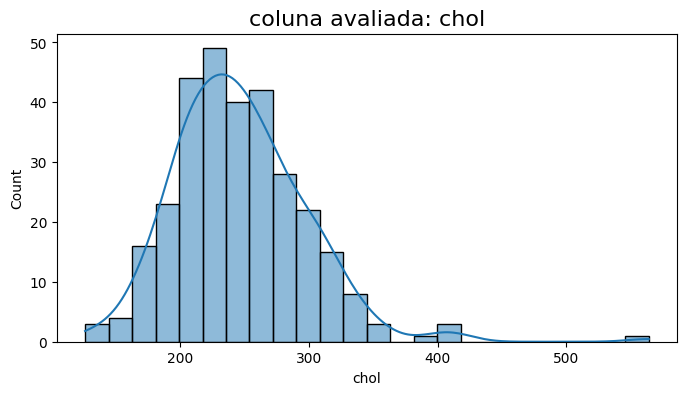

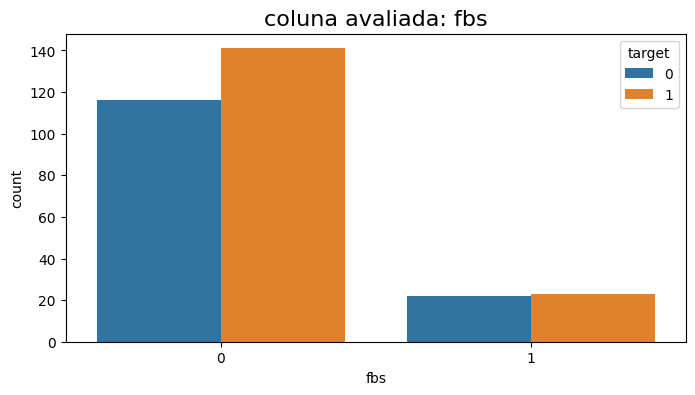

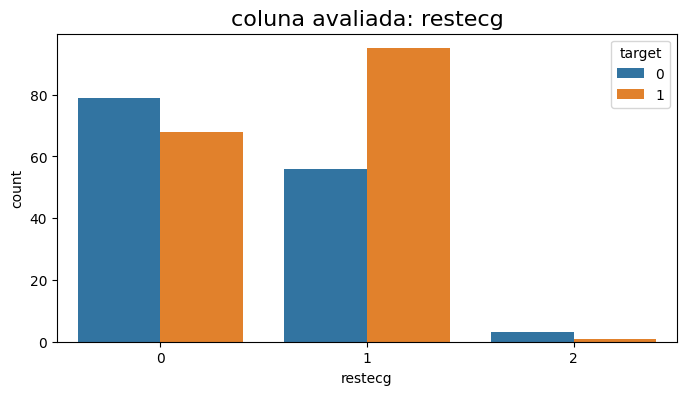

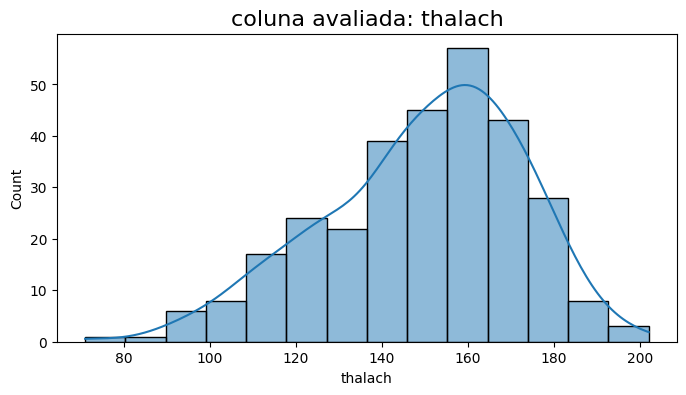

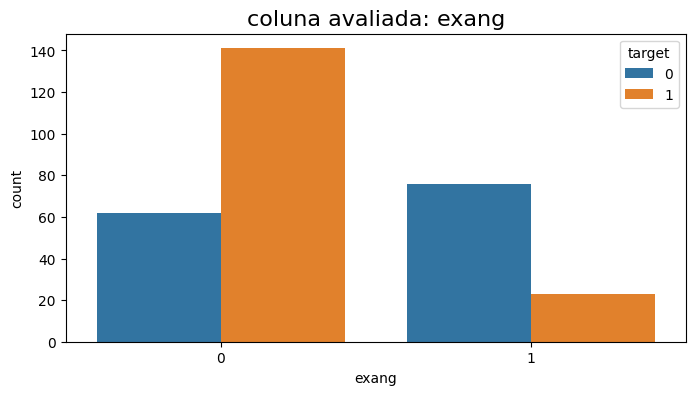

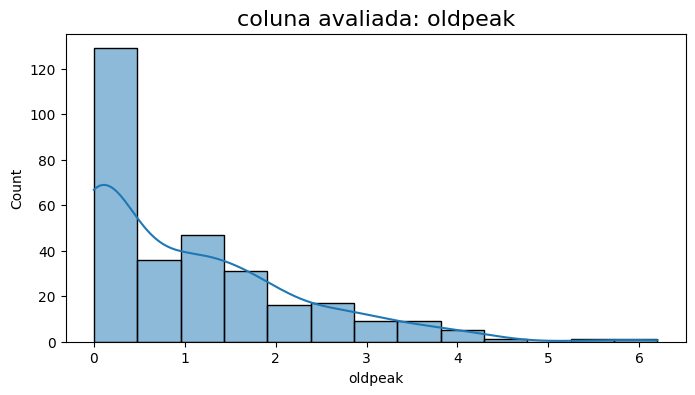

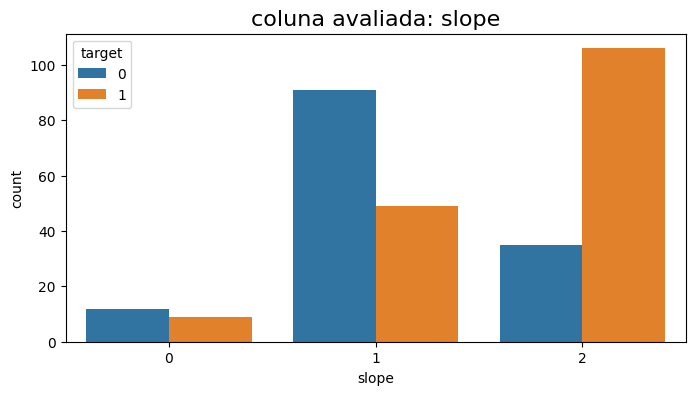

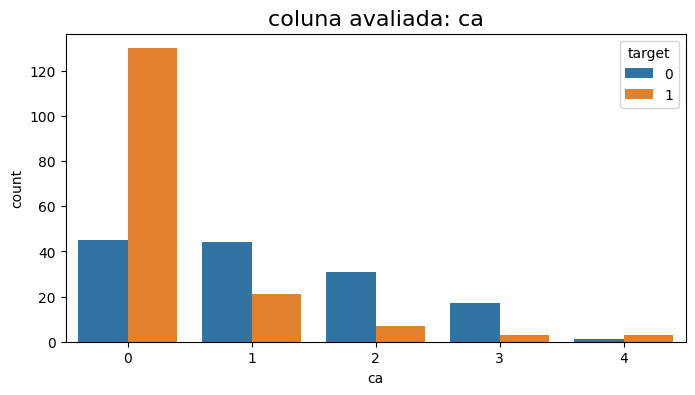

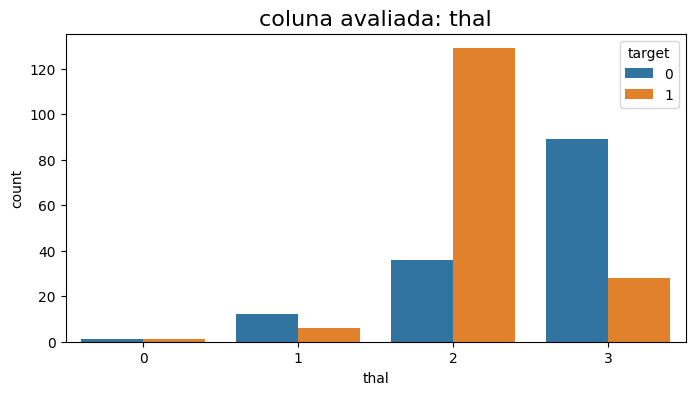

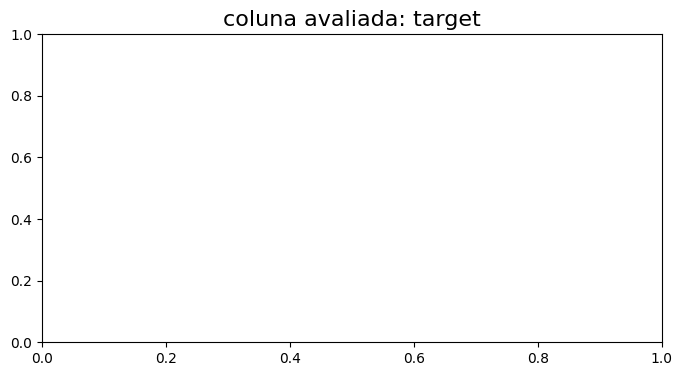

In [ ]:
for c in heart_data.columns:
  plt.figure(figsize= (8, 4))
  plt.title (f"coluna avaliada: {c}", fontsize = 16)
  if c in categoricas:
    sns.countplot (x = heart_data [c], hue = heart_data ['target'])
  if c in numericas:
    sns.histplot (heart_data[c], kde= True)


REMOVENDO OS OUTLIERS

<Axes: >

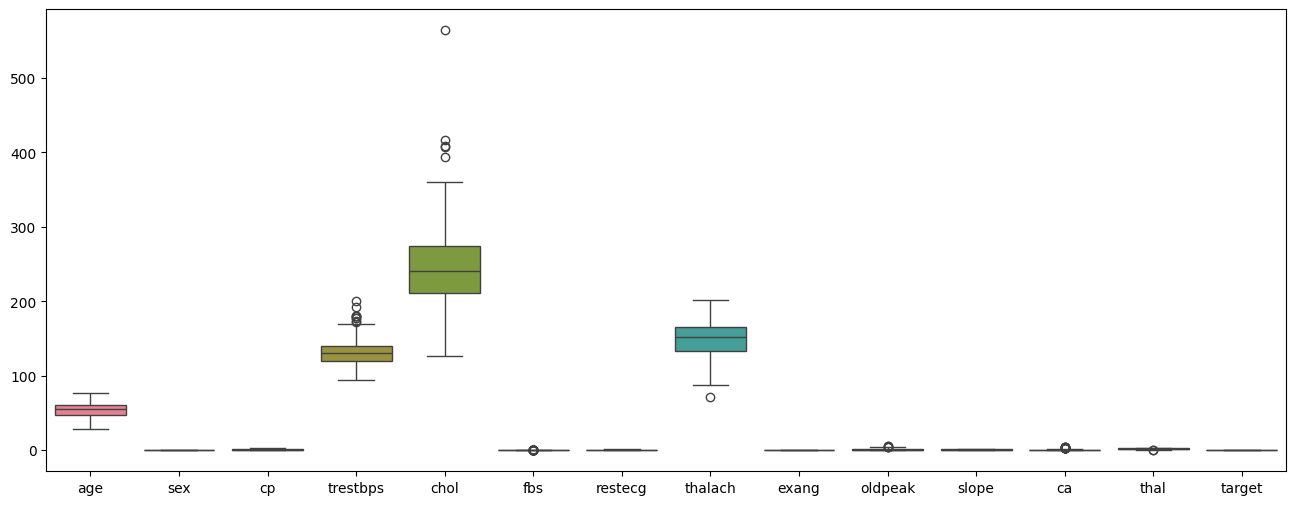

In [ ]:
plt.figure (figsize= (16, 6))
sns.boxplot (data=heart_data)

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Removendo os outliers

In [ ]:
heart_data ['trestbps'].quantile (0.99)

180.0

In [ ]:
heart_data1= heart_data [heart_data ['trestbps'] < heart_data ['trestbps'].quantile (0.99)]
heart_data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: >

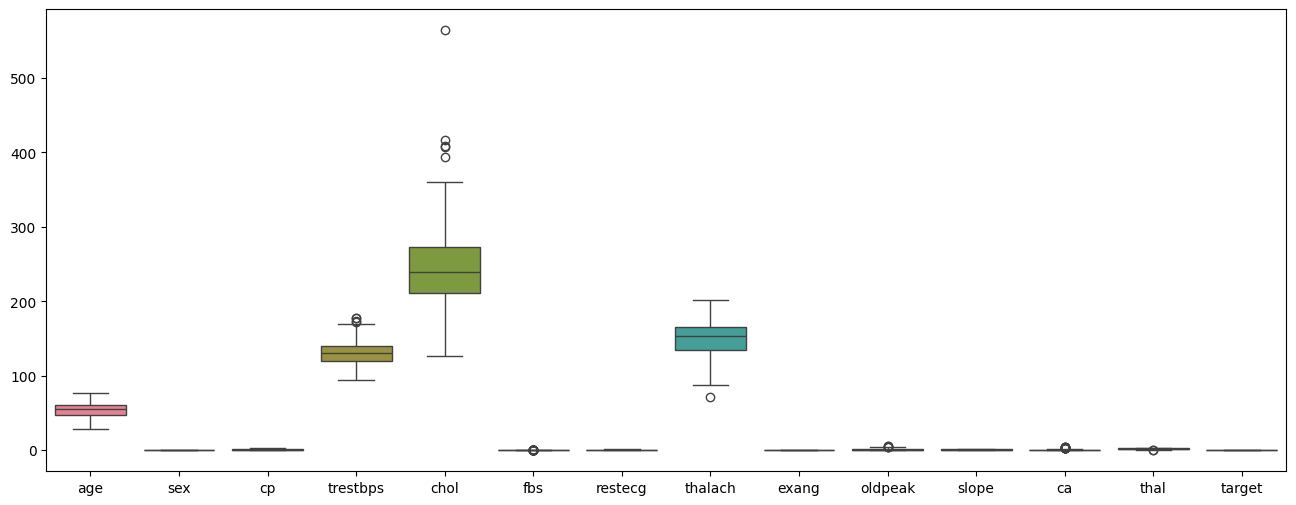

In [ ]:
plt.figure (figsize= (16, 6))
sns.boxplot (data=heart_data1)

In [ ]:
heart_data1. describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data1 ['chol'].quantile (0.98)

354.4799999999999

In [ ]:
heart_data2= heart_data1 [heart_data1 ['chol'] < heart_data1 ['chol'].quantile (0.98)]
heart_data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: >

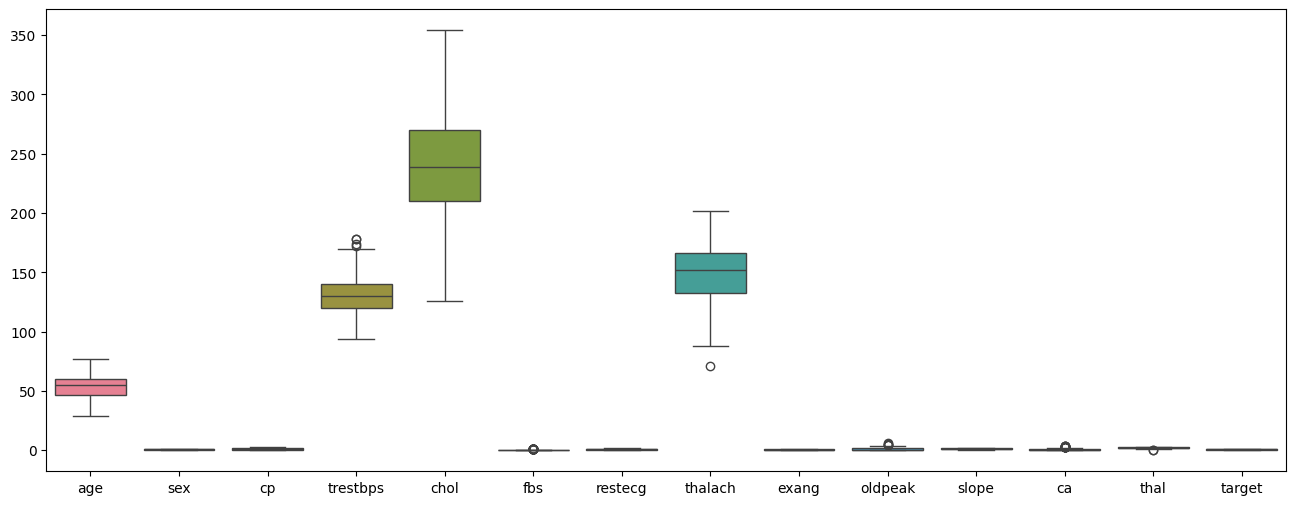

In [ ]:
plt.figure (figsize= (16, 6))
sns.boxplot (data=heart_data2)

In [ ]:
heart_data2 ['thalach'].quantile (0.005)

88.9

In [ ]:
heart_data3= heart_data2 [heart_data2 ['thalach'] > heart_data2 ['thalach'].quantile (0.05)]
heart_data3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: >

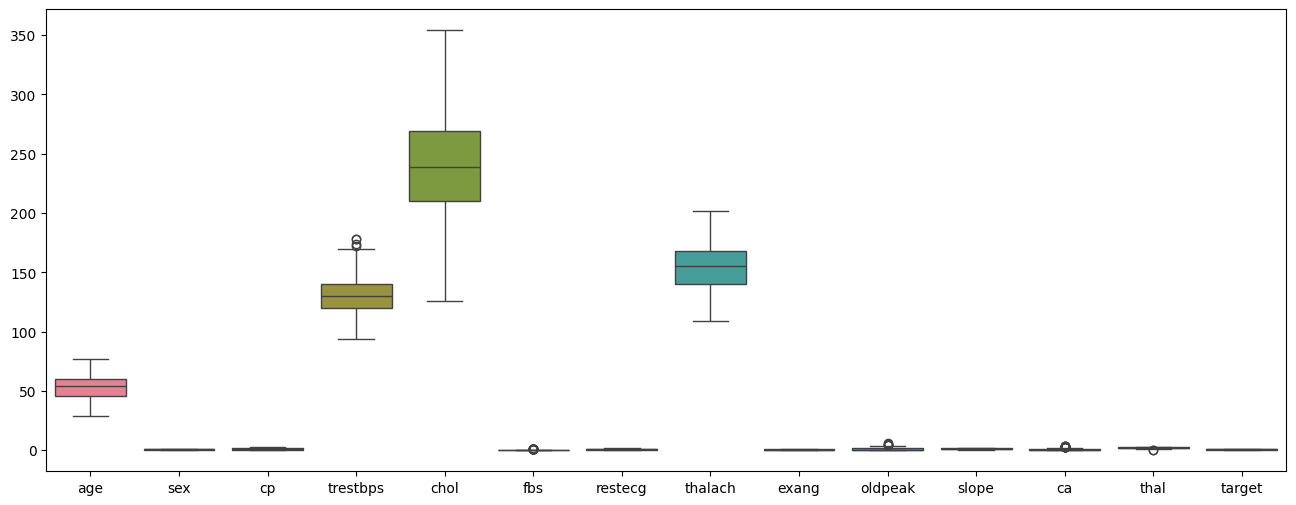

In [ ]:
plt.figure (figsize= (16, 6))
sns.boxplot (data=heart_data3)

In [ ]:
heart_data3. describe ()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,53.807273,0.694545,1.007273,130.400000,241.661818,0.138182,0.534545,152.425455,0.309091,0.998545,1.429091,0.683636,2.301818,0.570909
std,9.148967,0.461439,1.039345,16.185512,44.443089,0.345720,0.521165,19.926070,0.462961,1.161423,0.614209,1.002690,0.609981,0.495849
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,140.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = heart_data.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = heart_data.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

KNN: 0.646833 (0.083074)
CART: 0.776000 (0.083504)
NB: 0.805167 (0.061135)
SVM: 0.655000 (0.073899)


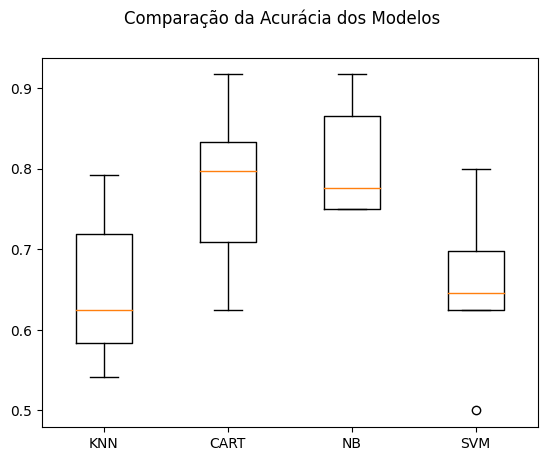

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

O modelo que melhor ajustou os dados foi Nave Bayes, com acurácia média de 80% e desvio padrão de, aproximadamente 6%.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.8032786885245902


Resultado: após as análises, verificou-se que o algoritmo Naive Bayes foi o que melhor modelou os dados obtendo uma acurácia média de 80% com um desvio padrão de 0,061 e após aplicação no conjunto de teste a acurácia permaneceu quase que inalterada.

O conjunto de dados analisado serviu para aplicação da disciplina ML ministrada no curso mas convém ressaltar que, talvez haja limitações pelo tamanho da amostra, principalmente pelo reduzido conjunto de dados analisados, após o tratamento aplicado nos dados. Porém, didaticamente serviu como aprendizado bastante profícuo da disciplina estudada.